In [1]:
import pandas as pd
patients_df = pd.read_csv("updated_patients.csv")
visits_df = pd.read_csv("visits.csv")
merged_df = pd.merge(visits_df, patients_df, on='patient_id', how='inner')
output_path = "patients+visits.csv"
merged_df.to_csv(output_path, index=False)

In [11]:
import pandas as pd

class HeartDiseaseAnalyzer:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def basic_info(self):
        print("Dataset Shape:", self.df.shape)
        print("\n Descriptive Stats:\n", self.df.describe())

    def analyze_bp_by_smoking(self):
        result = self.df.groupby('smoking')['systolic_bp'].mean()
        print("\n Avg Systolic BP by Smoking:\n", result)
        return result

    def analyze_bp_by_alcohol(self):
        result = self.df.groupby('alcohol')['systolic_bp'].mean()
        print("\n Avg Systolic BP by Alcohol:\n", result)
        return result

    def analyze_bp_by_stress(self):
        result = self.df.groupby('stress_level')['systolic_bp'].mean()
        print("\n  Avg Systolic BP by Stress Level:\n", result)
        return result

    def analyze_bmi_by_exercise(self):
        result = self.df.groupby('exercise_hours_per_week')['bmi'].mean()
        print("\n Avg BMI by Exercise Hours:\n", result.head(10))
        return result

    def ecg_distribution_by_gender(self):
        result = self.df.groupby('gender')['ecg_result'].value_counts()
        print("\n ECG Result Count by Gender:\n", result.head(10))
        return result

    def analyze_bp_by_family_history(self):
        result = self.df.groupby('family_history')['systolic_bp'].mean()
        print("\n Avg BP by Family History:\n", result)
        return result

    def full_analysis(self):
        self.basic_info()
        self.analyze_bp_by_smoking()
        self.analyze_bp_by_alcohol()
        self.analyze_bp_by_stress()
        self.analyze_bmi_by_exercise()
        self.ecg_distribution_by_gender()
        self.analyze_bp_by_family_history()

# Create object and perform full analysis

if __name__ == "__main__":
    file_path = "patients+visits.csv"
    analyzer = HeartDiseaseAnalyzer(file_path)
    analyzer.full_analysis()


Dataset Shape: (3000, 13)

 Descriptive Stats:
        systolic_bp          age          bmi  exercise_hours_per_week
count  3000.000000  3000.000000  3000.000000              3000.000000
mean    145.140000    58.570000    26.902600                 3.523000
std      31.885994    17.341703     4.018547                 2.359094
min      90.000000    30.000000    14.300000                 0.000000
25%     117.000000    44.000000    24.200000                 1.000000
50%     145.000000    58.000000    26.800000                 4.000000
75%     173.000000    74.000000    29.500000                 6.000000
max     199.000000    89.000000    41.500000                 7.000000

 Avg Systolic BP by Smoking:
 smoking
No     145.988904
Yes    142.946237
Name: systolic_bp, dtype: float64

 Avg Systolic BP by Alcohol:
 alcohol
No     145.980119
Yes    144.289738
Name: systolic_bp, dtype: float64

  Avg Systolic BP by Stress Level:
 stress_level
High      146.198356
Low       143.771784
Medium    14

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("patients+visits.csv")

# Convert visit_date to datetime format
df['visit_date'] = pd.to_datetime(df['visit_date'])

# Set Seaborn style
sns.set(style="whitegrid")

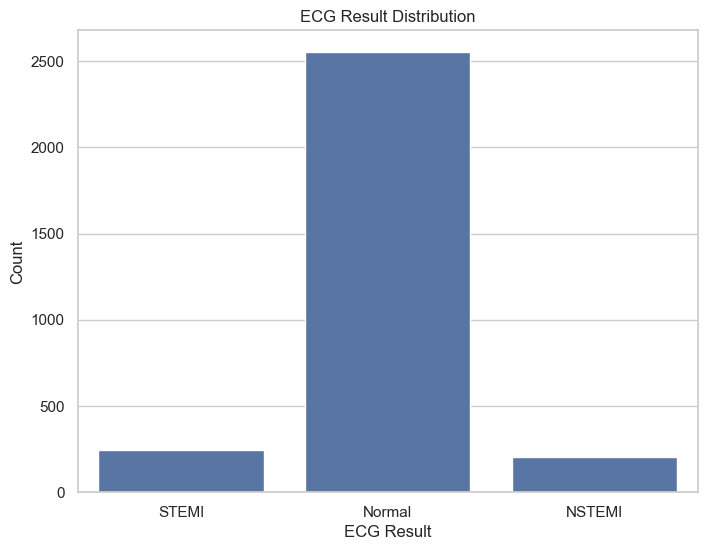

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ecg_result') 
plt.title('ECG Result Distribution')
plt.xlabel('ECG Result')
plt.ylabel('Count')
plt.show()

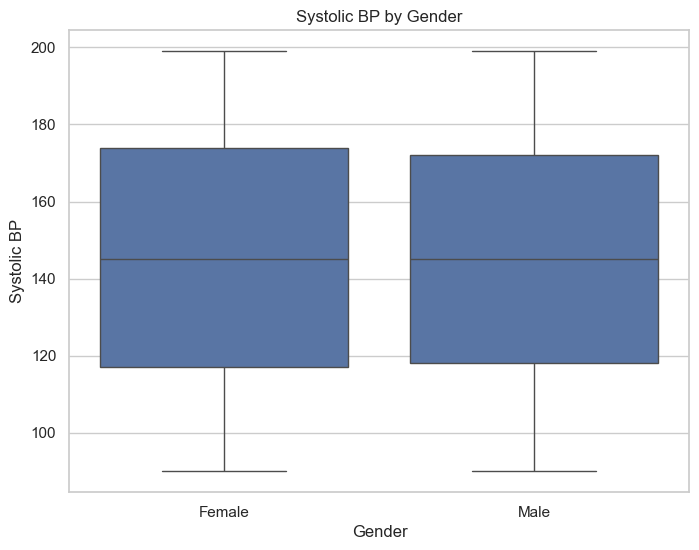

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='systolic_bp')
plt.title('Systolic BP by Gender')
plt.xlabel('Gender')
plt.ylabel('Systolic BP')
plt.show()

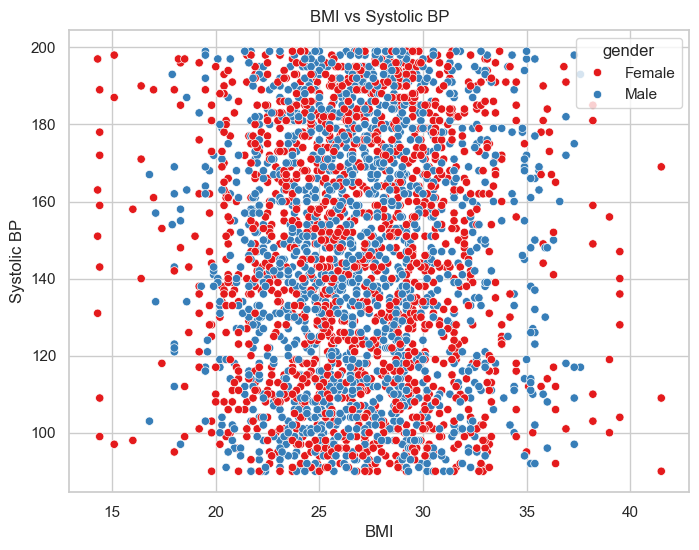

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='systolic_bp', hue='gender', palette='Set1')
plt.title('BMI vs Systolic BP')
plt.xlabel('BMI')
plt.ylabel('Systolic BP')
plt.show()

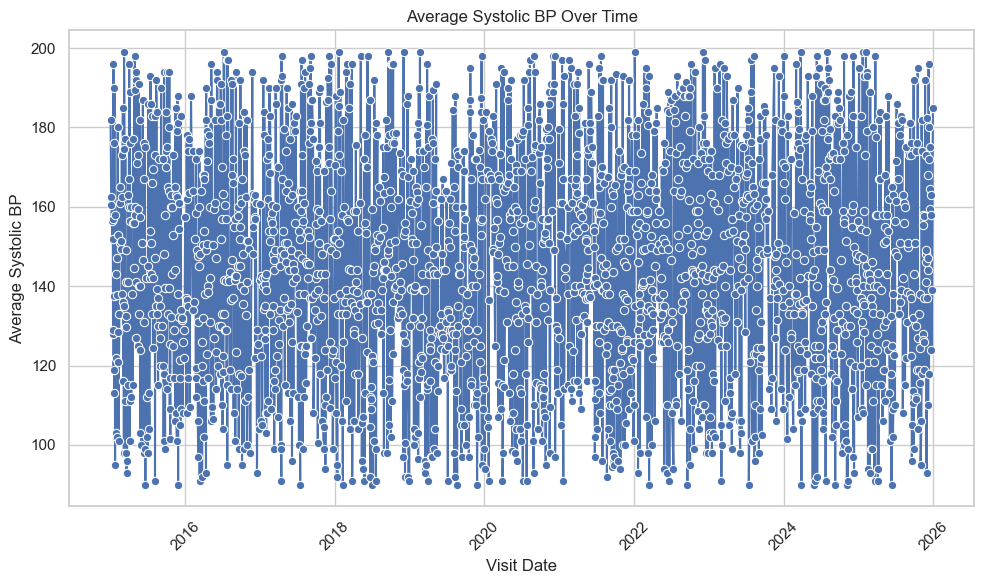

In [16]:
# Group by date and calculate average BP
avg_bp = df.groupby('visit_date')['systolic_bp'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_bp, x='visit_date', y='systolic_bp', marker='o')
plt.title('Average Systolic BP Over Time')
plt.xlabel('Visit Date')
plt.ylabel('Average Systolic BP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

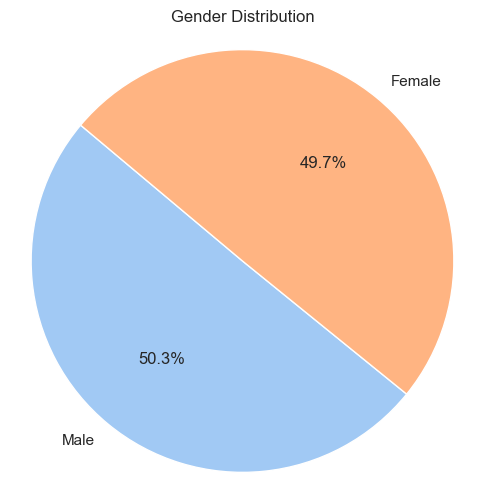

In [17]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

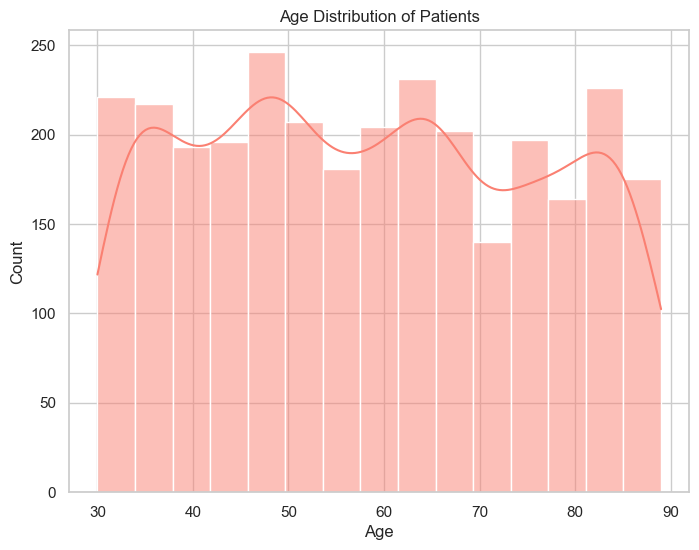

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=15, kde=True, color='salmon')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

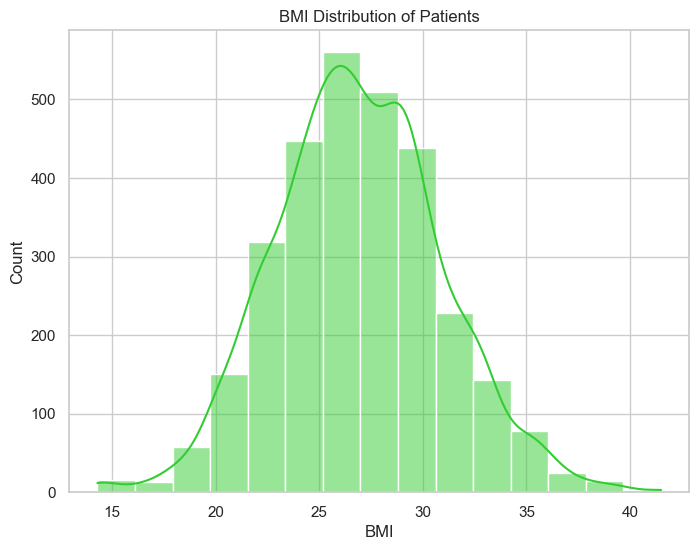

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='bmi', bins=15, kde=True, color='limegreen')
plt.title('BMI Distribution of Patients')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

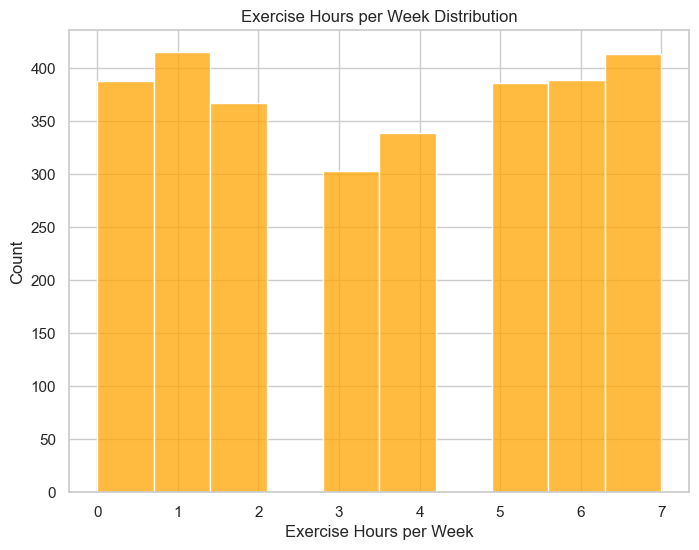

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='exercise_hours_per_week', bins=10, kde=False, color='orange')
plt.title('Exercise Hours per Week Distribution')
plt.xlabel('Exercise Hours per Week')
plt.ylabel('Count')
plt.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns

# Create a PDF file to save plots
pdf = PdfPages("health_data_visualizations.pdf")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ecg_result')  # Removed palette
plt.title('ECG Result Distribution')
plt.xlabel('ECG Result')
plt.ylabel('Count')
pdf.savefig()  # Save current figure to PDF
plt.close()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='systolic_bp')
plt.title('Systolic BP by Gender')
plt.xlabel('Gender')
plt.ylabel('Systolic BP')
pdf.savefig()  # Save current figure to PDF
plt.close()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='systolic_bp', hue='gender', palette='Set1')
plt.title('BMI vs Systolic BP')
plt.xlabel('BMI')
plt.ylabel('Systolic BP')
pdf.savefig()  # Save current figure to PDF
plt.close()

# Group by date and calculate average BP
avg_bp = df.groupby('visit_date')['systolic_bp'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_bp, x='visit_date', y='systolic_bp', marker='o')
plt.title('Average Systolic BP Over Time')
plt.xlabel('Visit Date')
plt.ylabel('Average Systolic BP')
pdf.savefig()  # Save current figure to PDF
plt.close()




# Plot 1: Histogram of Systolic BP
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='systolic_bp', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
pdf.savefig()  # Save current figure to PDF
plt.close()

# Plot 2: Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=15, kde=True, color='salmon')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
pdf.savefig()
plt.close()

# Plot 3: Histogram of BMI
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='bmi', bins=15, kde=True, color='limegreen')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
pdf.savefig()
plt.close()

# Plot 4: Histogram of Exercise Hours Per Week
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='exercise_hours_per_week', bins=10, kde=False, color='orange')
plt.title('Exercise Hours Per Week')
plt.xlabel('Hours')
plt.ylabel('Count')
pdf.savefig()
plt.close()

# Close the PDF
pdf.close()